### Packages

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from statsmodels.formula.api import ols
from IPython.display import display

# Data Pre-Processing

In [2]:
smmh = pd.read_csv('smmh.csv')
smmh.head(3)

,Timestamp,1. What is your age?,2. Gender,3. Relationship Status,4. Occupation Status,5. What type of organizations are you affiliated with?,6. Do you use social media?,7. What social media platforms do you commonly use?,8. What is the average time you spend on social media every day?,9. How often do you find yourself using Social media without a specific purpose?,...,11. Do you feel restless if you haven't used Social media in a while?,"12. On a scale of 1 to 5, how easily distracted are you?","13. On a scale of 1 to 5, how much are you bothered by worries?",14. Do you find it difficult to concentrate on things?,"15. On a scale of 1-5, how often do you compare yourself to other successful people through the use of social media?","16. Following the previous question, how do you feel about these comparisons, generally speaking?",17. How often do you look to seek validation from features of social media?,18. How often do you feel depressed or down?,"19. On a scale of 1 to 5, how frequently does your interest in daily activities fluctuate?","20. On a scale of 1 to 5, how often do you face issues regarding sleep?"
0,4/18/2022 19:18:47,21.0,Male,In a relationship,University Student,University,Yes,"Facebook, Twitter, Instagram, YouTube, Discord...",Between 2 and 3 hours,5,...,2,5,2,5,2,3,2,5,4,5
1,4/18/2022 19:19:28,21.0,Female,Single,University Student,University,Yes,"Facebook, Twitter, Instagram, YouTube, Discord...",More than 5 hours,4,...,2,4,5,4,5,1,1,5,4,5
2,4/18/2022 19:25:59,21.0,Female,Single,University Student,University,Yes,"Facebook, Instagram, YouTube, Pinterest",Between 3 and 4 hours,3,...,1,2,5,4,3,3,1,4,2,5


1. Remove `Timestamp` column
2. Rename all columns 
3. Separate the responses for *7. What social media platforms do you commonly use?* into individual columns, each representing a specific platform, with binary responses (0 or 1) to indicate whether the participant uses the platform
4. Create a new column calculating the number of paltforms each participant used


In [3]:
smmh.columns

Index(['Timestamp', '1. What is your age?', '2. Gender',
       '3. Relationship Status', '4. Occupation Status',
       '5. What type of organizations are you affiliated with?',
       '6. Do you use social media?',
       '7. What social media platforms do you commonly use?',
       '8. What is the average time you spend on social media every day?',
       '9. How often do you find yourself using Social media without a specific purpose?',
       '10. How often do you get distracted by Social media when you are busy doing something?',
       '11. Do you feel restless if you haven't used Social media in a while?',
       '12. On a scale of 1 to 5, how easily distracted are you?',
       '13. On a scale of 1 to 5, how much are you bothered by worries?',
       '14. Do you find it difficult to concentrate on things?',
       '15. On a scale of 1-5, how often do you compare yourself to other successful people through the use of social media?',
       '16. Following the previous question, 

In [4]:
smmh.shape

(481, 21)

In [5]:
smmh_df = smmh.copy()

# Remove `Timestamp` column
smmh_df = smmh_df.drop('Timestamp', axis=1)

# Rename columns
smmh_df.columns = [
	'age',
	'gender',
	'relationship',
	'occupation',
	'organisation',
	'sm_use',
	'platforms',
	'time_on_sm',
	'purposeless_sm_use',
	'distracted_by_sm',
	'restless_without_sm',
	'easily_distracted',
	'bothered_by_worries',
	'difficult_to_concentrate',
	'social_comparison',
	'social_comparison_feelings',
	'validation_seeking',
	'depressed',
	'interest_in_daily_activities',
	'sleep_issues'
]

# Separate responses by comma to create a list of response items
smp_responses = smmh_df['platforms'].str.split(',')
smp_responses = smp_responses.explode()	# transform each element of a list to a row with repeating index values
smp_responses = smp_responses.str.strip()	# remove trailing spaces
smp_cat = smp_responses.unique()	# identify unique categories
smp_cat = sorted(smp_cat)	# sort the categories in alphabetical order

# Create a new column for each platform with a binary response indicated use (0: No use, 1: Use)
for platform in smp_cat:
	smmh_df[platform] = smmh_df['platforms'].apply(lambda row: row.count(platform))

# Calculate the total number of platforms used per participant
smmh_df['total_platforms'] = smmh_df.iloc[:, -9:].sum(axis = 1)

# Remove `platforms` column
smmh_df = smmh_df.drop('platforms', axis = 1)

In [6]:
smmh_df.head()

,age,gender,relationship,occupation,organisation,sm_use,time_on_sm,purposeless_sm_use,distracted_by_sm,restless_without_sm,...,Discord,Facebook,Instagram,Pinterest,Reddit,Snapchat,TikTok,Twitter,YouTube,total_platforms
0,21.0,Male,In a relationship,University Student,University,Yes,Between 2 and 3 hours,5,3,2,...,1,1,1,0,1,0,0,1,1,6
1,21.0,Female,Single,University Student,University,Yes,More than 5 hours,4,3,2,...,1,1,1,0,1,0,0,1,1,6
2,21.0,Female,Single,University Student,University,Yes,Between 3 and 4 hours,3,2,1,...,0,1,1,1,0,0,0,0,1,4
3,21.0,Female,Single,University Student,University,Yes,More than 5 hours,4,2,1,...,0,1,1,0,0,0,0,0,0,2
4,21.0,Female,Single,University Student,University,Yes,Between 2 and 3 hours,3,5,4,...,0,1,1,0,0,0,0,0,1,3


In [7]:
# Check missing values
for cols in smmh_df.columns:
	print(f"{cols}", smmh_df[f'{cols}'].isna().sum())

age 0
gender 0
relationship 0
occupation 0
organisation 30
sm_use 0
time_on_sm 0
purposeless_sm_use 0
distracted_by_sm 0
restless_without_sm 0
easily_distracted 0
bothered_by_worries 0
difficult_to_concentrate 0
social_comparison 0
social_comparison_feelings 0
validation_seeking 0
depressed 0
interest_in_daily_activities 0
sleep_issues 0
Discord 0
Facebook 0
Instagram 0
Pinterest 0
Reddit 0
Snapchat 0
TikTok 0
Twitter 0
YouTube 0
total_platforms 0


# Descriptives Statistics

In [8]:
print(
    smmh_df['age'].min(),
    smmh_df['age'].max()
)

13.0 91.0


In [9]:
smmh_df = smmh_df[smmh_df['age'] >= 18]

smmh_df.shape


(462, 29)

In [10]:
# Calculate the mean and standard deviation for each question 
qscores_dict = {}
q_var = [
	'age', 'purposeless_sm_use', 'distracted_by_sm',
	'restless_without_sm', 'easily_distracted', 'bothered_by_worries',
	'difficult_to_concentrate', 'social_comparison',
	'social_comparison_feelings', 'validation_seeking', 'depressed',
	'interest_in_daily_activities', 'sleep_issues'
]

for score in q_var:
	scores = smmh_df[score].values
	qscores_dict[f'{score}'] = [scores.mean().round(2), scores.std().round(2)]

qscores_dict = pd.DataFrame.from_dict(
	qscores_dict,
	orient = 'index',
	columns = ['Mean', 'Standard deviation']
)

qscores_dict

,Mean,Standard deviation
age,26.57,9.87
purposeless_sm_use,3.56,1.10
distracted_by_sm,3.32,1.32
restless_without_sm,2.60,1.27
easily_distracted,3.35,1.18
bothered_by_worries,3.56,1.29
difficult_to_concentrate,3.25,1.35
social_comparison,2.83,1.41
social_comparison_feelings,2.78,1.06
validation_seeking,2.47,1.24


In [11]:
# Count of demographics
dem_var = [
	'gender', 'relationship', 
	'occupation', 'organisation', 'sm_use',
	'time_on_sm', 'total_platforms'
]

for dem in dem_var:
	display(
		smmh_df[dem]
		.value_counts()
		.to_frame(name="Count")
		.assign(Percentage = lambda x: ((x["Count"] / x["Count"].sum()) * 100).round(1))  # Calculate percentage
		.reset_index()
		.rename(columns={"index": dem})
	)

,gender,Count,Percentage
0,Female,258,55.8
1,Male,198,42.9
2,Nonbinary,1,0.2
3,Non-binary,1,0.2
4,NB,1,0.2
5,Trans,1,0.2
6,Non binary,1,0.2
7,There are others???,1,0.2


,relationship,Count,Percentage
0,Single,266,57.6
1,Married,101,21.9
2,In a relationship,88,19.0
3,Divorced,7,1.5


,occupation,Count,Percentage
0,University Student,292,63.2
1,Salaried Worker,132,28.6
2,School Student,30,6.5
3,Retired,8,1.7


,organisation,Count,Percentage
0,University,239,55.1
1,Private,60,13.8
2,Company,30,6.9
3,School,27,6.2
4,"University, Company",19,4.4
5,"University, Private",16,3.7
6,"School, University",9,2.1
7,"Company, Private",7,1.6
8,Goverment,6,1.4
9,"University, Company, Private",5,1.2


,sm_use,Count,Percentage
0,Yes,459,99.4
1,No,3,0.6


,time_on_sm,Count,Percentage
0,More than 5 hours,112,24.2
1,Between 2 and 3 hours,96,20.8
2,Between 3 and 4 hours,91,19.7
3,Between 1 and 2 hours,69,14.9
4,Between 4 and 5 hours,61,13.2
5,Less than an Hour,33,7.1


,total_platforms,Count,Percentage
0,4,97,21.0
1,3,76,16.5
2,5,75,16.2
3,2,57,12.3
4,6,50,10.8
5,7,42,9.1
6,1,36,7.8
7,8,18,3.9
8,9,11,2.4


In [12]:
smmh_df.loc[smmh_df['sm_use'] == 'No']

,age,gender,relationship,occupation,organisation,sm_use,time_on_sm,purposeless_sm_use,distracted_by_sm,restless_without_sm,...,Discord,Facebook,Instagram,Pinterest,Reddit,Snapchat,TikTok,Twitter,YouTube,total_platforms
9,20.0,Male,Single,University Student,University,No,Less than an Hour,1,1,1,...,0,0,0,1,1,0,0,0,0,2
54,26.0,Male,In a relationship,Salaried Worker,Company,No,Between 1 and 2 hours,4,1,1,...,1,0,0,0,1,0,0,0,1,3
134,50.0,Male,Divorced,Salaried Worker,Private,No,Between 1 and 2 hours,2,1,1,...,0,0,1,0,0,0,0,0,1,2


Three participants noted that they don't use social media they also noted mulitple social media platforms they use. Despite this uncertainty, the participants will not be removed from the sample.

In [13]:
# Clean the responses for gender using regular expression
smmh_df.replace(
	{
		r'(?i).*(non|nb|trans).*': 'Non-binary/Trans', 
		r'(?i).*(\?\?\?).*': np.nan
	},  
	regex = True,
	inplace = True
)

smmh_df['gender'].value_counts().reset_index()

,gender,count
0,Female,258
1,Male,198
2,Non-binary/Trans,5


,Total platforms,Frequency,Percentage,Cum_percentage
6,1,36,7.79,7.79
3,2,57,12.34,20.13
1,3,76,16.45,36.58
0,4,97,21.00,57.58
2,5,75,16.23,73.81
4,6,50,10.82,84.63
5,7,42,9.09,93.72
7,8,18,3.90,97.62
8,9,11,2.38,100.00


Text(0, 0.5, 'Percentage (%)')

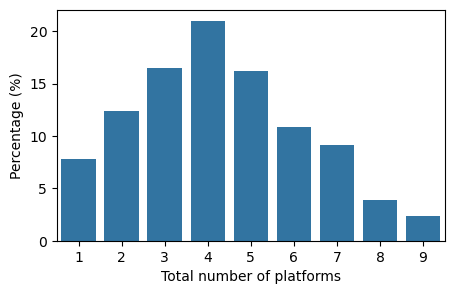

In [38]:
# Frequency of total platforms used by participants 
num_plat = smmh_df['total_platforms'].value_counts().reset_index()
num_plat.columns = ['Total platforms', 'Frequency']
num_plat.sort_values(by = 'Total platforms', ascending=True, inplace=True)
num_plat['Percentage'] = ((num_plat['Frequency'] / num_plat['Frequency'].sum()) * 100).round(2)
num_plat['Cum_percentage'] = num_plat['Percentage'].cumsum()

display(num_plat)

# Barplot
plt.figure(figsize = (5, 3))
sns.barplot(
	data = num_plat,
	x = 'Total platforms',
	y = 'Percentage'
)
plt.xlabel('Total number of platforms')
plt.ylabel('Percentage (%)')

In [42]:
avg_time.head()

,time_on_sm,count,Percentage
0,More than 5 hours,112,24.24
1,Between 2 and 3 hours,96,20.78
2,Between 3 and 4 hours,91,19.70
3,Between 1 and 2 hours,69,14.94
4,Between 4 and 5 hours,61,13.20


([0, 1, 2, 3, 4, 5],
 [Text(0, 0, 'More than 5 hours'),
  Text(1, 0, 'Between 2 and 3 hours'),
  Text(2, 0, 'Between 3 and 4 hours'),
  Text(3, 0, 'Between 1 and 2 hours'),
  Text(4, 0, 'Between 4 and 5 hours'),
  Text(5, 0, 'Less than an Hour')])

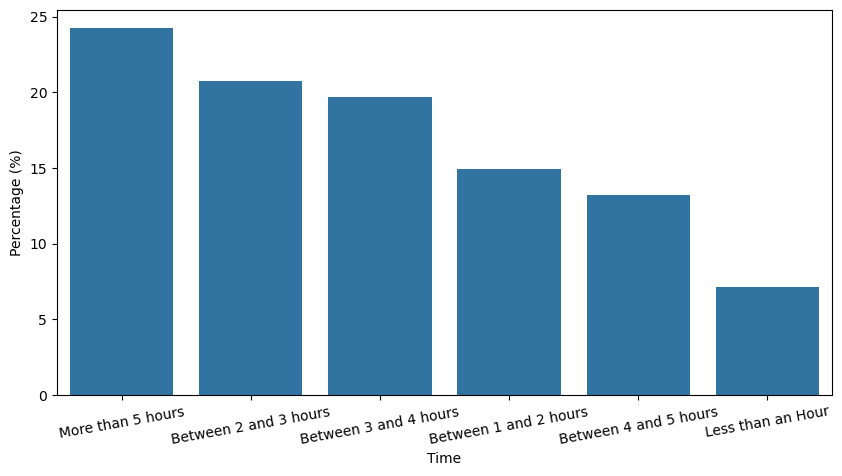

In [47]:
# Frequency of average time on platforms 
avg_time = smmh_df.loc[ : ,'time_on_sm'].value_counts().reset_index()
avg_time['Percentage'] = ((avg_time['count'] / avg_time['count'].sum()) * 100).round(2)


plt.figure(figsize = (10, 5))
sns.barplot(
	data = avg_time,
	x = 'time_on_sm',
	y = 'Percentage'
)
plt.xlabel('Time')
plt.ylabel('Percentage (%)')
plt.xticks(rotation = 10)

In [16]:
pd.DataFrame(smmh_df.columns)

,0
0,age
1,gender
2,relationship
3,occupation
4,organisation
5,sm_use
6,time_on_sm
7,purposeless_sm_use
8,distracted_by_sm
9,restless_without_sm


In [17]:
smp_cat

['Discord',
 'Facebook',
 'Instagram',
 'Pinterest',
 'Reddit',
 'Snapchat',
 'TikTok',
 'Twitter',
 'YouTube']

In [18]:
# Calculate frequency of use for each platform
platform_freq = {}
for cat in smp_cat:
	print(f'{cat}:', smmh_df[f'{cat}'].sum())
	platform_freq[f'{cat}'] = smmh_df[f'{cat}'].sum()

# Convert to dataframe
platfreq_df = pd.DataFrame().from_dict(platform_freq, orient='index').reset_index()
platfreq_df.columns = ['Platform', 'Frequency']

# Include `Proportion` column
platfreq_df['Proportion'] = ((platfreq_df['Frequency'] / platfreq_df['Frequency'].sum()) * 100).round(2)
platfreq_df.sort_values(by='Proportion', ascending=False)	# sort `Proportion` column in descending order

Discord: 187
Facebook: 400
Instagram: 343
Pinterest: 138
Reddit: 120
Snapchat: 176
TikTok: 90
Twitter: 127
YouTube: 397


,Platform,Frequency,Proportion
1,Facebook,400,20.22
8,YouTube,397,20.07
2,Instagram,343,17.34
0,Discord,187,9.45
5,Snapchat,176,8.90
3,Pinterest,138,6.98
7,Twitter,127,6.42
4,Reddit,120,6.07
6,TikTok,90,4.55


Text(0.5, 1.0, 'Distribution of platforms')

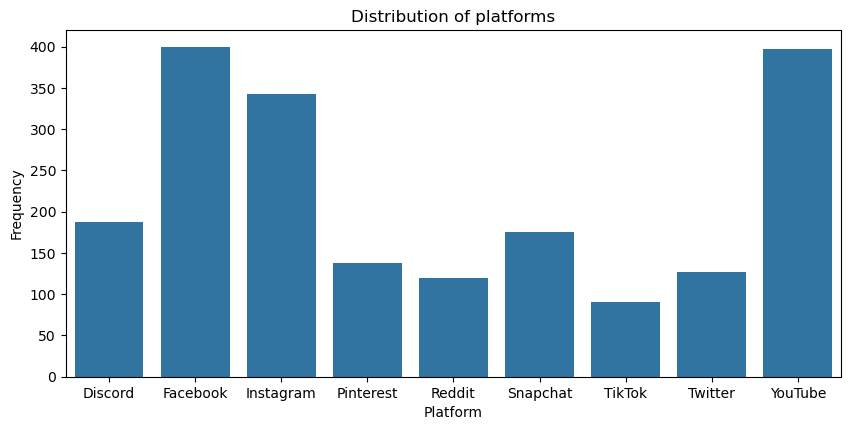

In [19]:
plt.figure(figsize=(10, 4.5))
sns.barplot(
    data = platfreq_df,
    x = "Platform",
    y = "Frequency"
)
plt.title('Distribution of platforms')

# PCA

In [20]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [21]:
# Select key columns
qcols = smmh_df.columns[7:19]
qcols.isna().sum()	# check for missing values

np.int64(0)

In [22]:
# Identify columns of interest
qcols = smmh_df.columns[7:19].tolist()	# create a list of interested columns
qcols_df = smmh_df[qcols]	# select columns of interest from the datafram

# Preprocessing column data
qcols_df = qcols_df.apply(pd.to_numeric, errors = 'coerce')	# convert interested columns to numeric
qcols_df = qcols_df.fillna(qcols_df.mean())	# fill missing values using the column mean

# Standardise the data
scaler = StandardScaler()
qcols_scaled = scaler.fit_transform(qcols_df)

Explained Variance by Component: [0.3998241  0.09469076 0.09373704 0.07836473 0.0639365 ]


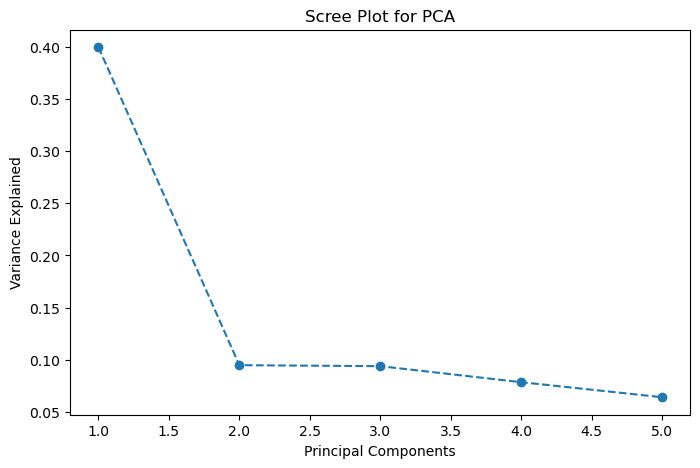

                                   PC1       PC2       PC3       PC4       PC5
purposeless_sm_use            0.248320 -0.422053 -0.046097  0.020812  0.683793
distracted_by_sm              0.331475 -0.317483  0.013151 -0.227010  0.043253
restless_without_sm           0.303831 -0.289560  0.108470 -0.317056 -0.136623
easily_distracted             0.351307 -0.206733 -0.197502 -0.147442 -0.250594
bothered_by_worries           0.323839  0.243204 -0.159507  0.143218 -0.258994
difficult_to_concentrate      0.362138 -0.006656 -0.135934  0.017672 -0.350537
social_comparison             0.262942  0.476283  0.220525 -0.237266  0.060078
social_comparison_feelings    0.054895 -0.370298  0.664541  0.452917 -0.339930
validation_seeking            0.198560  0.308437  0.617464 -0.147058  0.259976
depressed                     0.330563  0.250603 -0.087169  0.194101  0.027384
interest_in_daily_activities  0.324219  0.085627 -0.029874  0.035272  0.149091
sleep_issues                  0.225272  0.077883 -0.

In [23]:
# Apply PCA with five components
n = 5
pca = PCA(n_components=n)
principal_components = pca.fit_transform(qcols_scaled)

# Create a DataFrame with principal components
pca_df = pd.DataFrame(principal_components, columns=[f'PC{i+1}' for i in range(n)])

# Explained variance ratio (i.e., determine how much variance each component captures)
explained_variance = pca.explained_variance_ratio_
print("Explained Variance by Component:", explained_variance)

# Scree Plot (Elbow Method)
plt.figure(figsize=(8, 5))
plt.plot(range(1, len(explained_variance) + 1), explained_variance, marker='o', linestyle='--')
plt.xlabel('Principal Components')
plt.ylabel('Variance Explained')
plt.title('Scree Plot for PCA')
plt.show()

# Loadings to interpret groups of questions
loadings = pd.DataFrame(pca.components_, columns=qcols, index=[f'PC{i+1}' for i in range(n)])
print(loadings.T)  # transpose to see variables per component

In [24]:
# Apply PCA with two components
n = 2
pca = PCA(n_components=n)
principal_components = pca.fit_transform(qcols_scaled)

# Create a DataFrame with principal components
pca_df = pd.DataFrame(principal_components, columns=[f'PC{i+1}' for i in range(n)])

# Explained variance ratio (i.e., determine how much variance each component captures)
explained_variance = pca.explained_variance_ratio_
print("Explained Variance by Component:", explained_variance)

# Loadings to interpret groups of questions
loadings = pd.DataFrame(pca.components_, columns=qcols, index=[f'PC{i+1}' for i in range(n)])
print(loadings.T)  # transpose to see variables per component

Explained Variance by Component: [0.3998241  0.09469076]
                                   PC1       PC2
purposeless_sm_use            0.248320 -0.422053
distracted_by_sm              0.331475 -0.317483
restless_without_sm           0.303831 -0.289560
easily_distracted             0.351307 -0.206733
bothered_by_worries           0.323839  0.243204
difficult_to_concentrate      0.362138 -0.006656
social_comparison             0.262942  0.476283
social_comparison_feelings    0.054895 -0.370298
validation_seeking            0.198560  0.308437
depressed                     0.330563  0.250603
interest_in_daily_activities  0.324219  0.085627
sleep_issues                  0.225272  0.077883


# Incorporating Principal Components

In [25]:
pd.DataFrame({'Column Name': smmh_df.columns})

,Column Name
0,age
1,gender
2,relationship
3,occupation
4,organisation
5,sm_use
6,time_on_sm
7,purposeless_sm_use
8,distracted_by_sm
9,restless_without_sm


In [26]:
smmh_df_new = smmh_df.copy()

total_mh = smmh_df_new.columns[np.r_[7: 19]]
cog_emo = smmh_df_new.columns[np.r_[8:13, 16:19]]
comp_val = smmh_df_new.columns[[7, 13, 14, 15]]

smmh_df_new['TotalMH'] = smmh_df_new[total_mh].sum(axis = 1)
smmh_df_new['CompVal'] = smmh_df_new[comp_val].sum(axis = 1)
smmh_df_new['CogEmo'] = smmh_df_new[cog_emo].sum(axis = 1)

In [27]:
smmh_df_new

,age,gender,relationship,occupation,organisation,sm_use,time_on_sm,purposeless_sm_use,distracted_by_sm,restless_without_sm,...,Pinterest,Reddit,Snapchat,TikTok,Twitter,YouTube,total_platforms,TotalMH,CompVal,CogEmo
0,21.0,Male,In a relationship,University Student,University,Yes,Between 2 and 3 hours,5,3,2,...,0,1,0,0,1,1,6,43,12,31
1,21.0,Female,Single,University Student,University,Yes,More than 5 hours,4,3,2,...,0,1,0,0,1,1,6,43,11,32
2,21.0,Female,Single,University Student,University,Yes,Between 3 and 4 hours,3,2,1,...,1,0,0,0,0,1,4,35,10,25
3,21.0,Female,Single,University Student,University,Yes,More than 5 hours,4,2,1,...,0,0,0,0,0,0,2,35,12,23
4,21.0,Female,Single,University Student,University,Yes,Between 2 and 3 hours,3,5,4,...,0,0,0,0,0,1,3,44,12,32
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
476,24.0,Male,Single,Salaried Worker,"University, Private",Yes,Between 2 and 3 hours,3,4,3,...,0,0,0,0,0,1,3,42,13,29
477,26.0,Female,Married,Salaried Worker,University,Yes,Between 1 and 2 hours,2,1,2,...,0,0,0,0,0,1,2,35,12,23
478,29.0,Female,Married,Salaried Worker,University,Yes,Between 2 and 3 hours,3,3,4,...,0,0,0,0,0,1,2,34,13,21
479,21.0,Male,Single,University Student,University,Yes,Between 2 and 3 hours,2,3,2,...,1,0,0,0,1,1,6,37,11,26


## Descriptives

In [28]:
mh_scores = list(smmh_df_new.columns[-3:])
mhscores_dict = {}

for mh in mh_scores:
	mhscores_dict[f'{mh}'] = [smmh_df_new[f'{mh}'].mean().round(2), smmh_df_new[f'{mh}'].std().round(2)]

pd.DataFrame().from_dict(mhscores_dict, orient='index', columns=['Mean', 'Std'])

,Mean,Std
TotalMH,37.39,9.42
CompVal,11.65,2.97
CogEmo,25.74,7.41


# Comparing mental health scores between Reddit and Instagram users

In [29]:
pd.DataFrame(smmh_df_new.columns)

,0
0,age
1,gender
2,relationship
3,occupation
4,organisation
5,sm_use
6,time_on_sm
7,purposeless_sm_use
8,distracted_by_sm
9,restless_without_sm


In [30]:
smmh_df_new = smmh_df_new[smmh_df_new.columns[np.r_[19:32]]]

In [31]:
reddit_df = smmh_df_new[(smmh_df_new['Reddit'] == 1) & (smmh_df_new['Instagram'] == 0)]
insta = smmh_df_new[(smmh_df_new['Reddit'] == 0) & (smmh_df_new['Instagram'] == 1)]

print(reddit_df.shape, insta.shape, reddit_df.shape[0] + insta.shape[0])

(30, 13) (253, 13) 283


In [32]:
insta_df = insta.sample(n=30, random_state=5)

print(insta_df.shape)

(30, 13)


In [33]:
reddit_MH = reddit_df['TotalMH'].values
insta_MH = insta_df['TotalMH'].values

reddit_CV = reddit_df['CompVal'].values
insta_CV = insta_df['CompVal'].values

reddit_CE = reddit_df['CogEmo'].values
insta_CE = insta_df['CogEmo'].values

In [34]:
# Levene's test (check whether variance between groups is equal)
from scipy.stats import levene
levene_dict = {}

names = ['MH', 'CV', 'CE']
reddit_val = [reddit_MH, reddit_CV, reddit_CE]
insta_vals = [insta_MH, insta_CV, insta_CE]

for name, rval, ival in zip(names, reddit_val, insta_vals):
	lstat, pvalue = levene(rval, ival)
	levene_dict[f'{name}'] = [lstat.round(2), pvalue.round(3)]

rp_ttest = pd.DataFrame().from_dict(levene_dict, orient='index')
rp_ttest.columns = ['lstat', 'p-value']

display(rp_ttest)

,lstat,p-value
MH,0.20,0.656
CV,0.03,0.862
CE,1.37,0.246


If $p < 0.05$, variances are significantly different (use Welch’s t-test with `equal_var=False` in `ttest_ind`).

If $p ≥ 0.05$, assume equal variances (use regular t-test with `equal_var=True`).

In [35]:
from scipy.stats import ttest_ind
import pingouin as pg

ttest_dict = {}
cohensd = {}

names = ['MH', 'CV', 'CE']
reddit_val = [reddit_MH, reddit_CV, reddit_CE]
insta_vals = [insta_MH, insta_CV, insta_CE]

for name, rval, ival in zip(names, reddit_val, insta_vals):
	# t-test
	tstat, pvalue = ttest_ind(rval, ival, equal_var=True)
	ttest_dict[f'{name}'] = [tstat.round(3), pvalue.round(5)]

	# Cohen's d
	cohensd[f'{name}'] = pg.compute_effsize(rval, ival, eftype='cohen').round(3)

# t-test dataframe
rp_ttest = pd.DataFrame().from_dict(ttest_dict, orient='index')
rp_ttest.columns = ['tstat', 'p-value']

# Cohen's d dataframe
rp_cohensd = pd.DataFrame().from_dict(cohensd, orient='index')
rp_cohensd.columns = ['cohens_d']

display(rp_ttest, rp_cohensd)


# Mean
group_means = {}
names = ['reddit_MH', 'reddit_CV', 'reddit_CE', 'insta_MH', 'insta_CV', 'insta_CE']
rp_vals = [reddit_MH, reddit_CV, reddit_CE, insta_MH, insta_CV, insta_CE]

for name, rp in zip(names, rp_vals):
	group_means[f'{name}'] = [np.mean(rp).round(2), np.std(rp).round(2)]

rp_means = pd.DataFrame().from_dict(group_means, orient='index')
rp_means.columns = ['mean', 'std']

display(rp_means)


,tstat,p-value
MH,-1.800,0.07706
CV,-2.770,0.00753
CE,-1.339,0.18567


,cohens_d
MH,-0.465
CV,-0.715
CE,-0.346


,mean,std
reddit_MH,32.40,9.88
reddit_CV,9.73,2.28
reddit_CE,22.67,8.63
insta_MH,36.83,8.85
insta_CV,11.40,2.30
insta_CE,25.43,7.01


Cohen's d: The negative sign means that Group 1 (reddit) has a lower mean than Group 2 (instagram).
- 0.2 → Small effect
- 0.5 → Medium effect
- 0.8 → Large effect